### Import bibliotek


In [52]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Wczytanie i przygotowanie danych


In [32]:
print(*[filename.removesuffix(".json") for filename in os.listdir("./opinions")], sep="\n")

158674272
176018202
84514582


In [33]:
product_id=input("Podaj kod productu: ")
opinios= pd.read_json(f"./opinions/{product_id}.json").set_index('review_id')
opinios


,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
12535429,g...6,None,3/5,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
13551598,b...a,Polecam,4/5,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
18299406,U...o,Polecam,"4,5/5",Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
15226709,k...l,Polecam,4/5,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
13501735,g...k,None,"3,5/5",produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
14283834,Użytkownik Ceneo,Polecam,4/5,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
11176459,Madziana,Polecam,5/5,Drukarka od samego początku jest bardzo przyja...,"[jakość wydruków, szybkość wydruku, wydajność]",[],3,5,2019-10-19 23:50:49,None
18283057,u...g,None,"3,5/5",urządzenie przy pierwszym użytkowaniu wydaje s...,[],[],0,0,2024-01-08 15:16:39,2023-12-18 13:21:12
13654028,p...m,Nie polecam,1/5,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40


In [34]:
opinios.stars= opinios.stars.apply(lambda s: s.split('/')[0].replace(',', '.')).astype(float)
opinios.likes= opinios.likes.astype(int)
opinios.dislikes= opinios.dislikes.astype(int)
opinios

,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
12535429,g...6,None,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44
13551598,b...a,Polecam,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
18299406,U...o,Polecam,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
15226709,k...l,Polecam,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
13501735,g...k,None,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01
14283834,Użytkownik Ceneo,Polecam,4.0,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
11176459,Madziana,Polecam,5.0,Drukarka od samego początku jest bardzo przyja...,"[jakość wydruków, szybkość wydruku, wydajność]",[],3,5,2019-10-19 23:50:49,None
18283057,u...g,None,3.5,urządzenie przy pierwszym użytkowaniu wydaje s...,[],[],0,0,2024-01-08 15:16:39,2023-12-18 13:21:12
13654028,p...m,Nie polecam,1.0,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40


### Podstawowe statystyki


In [40]:
reviews_count=opinios.shape[0]
pros_count= opinios.pros.astype(bool).sum()
cons_count=opinios.cons.astype(bool).sum()
pros_cons_count=opinios.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()
avarage_score=round(opinios.stars.mean(), 2)
print(f"Liczba opinii o produkcie: {reviews_count}")
print(f"Liczba opinii przy ktorych podane zostala lista zalet: {pros_count}")
print(f"Liczba opinii przy ktorych podana zostala lista wad: {cons_count}")
print(f'Liczba opinii przy ktorych podana zostala lista zalet oraz lista wad {pros_cons_count}')
print(f"Średnia liczba gwiazdek dla produktu: {avarage_score}")

Liczba opinii o produkcie: 10
Liczba opinii przy ktorych podane zostala lista zalet: 6
Liczba opinii przy ktorych podana zostala lista wad: 5
Liczba opinii przy ktorych podana zostala lista zalet oraz lista wad 4
Średnia liczba gwiazdek dla produktu: 3.3


In [48]:
pros = opinios.pros.explode().value_counts()
cons= opinios.cons.explode().value_counts()

cons
głośność pracy      4
jakość wydruków     2
szybkość wydruku    2
jakość wydruku      1
Name: count, dtype: int64

### Wykresy


In [66]:
recommendation= opinios.recomendation.value_counts(dropna=False).reindex(['Nie Polecam','Polecam', None], fill_value=0)
recommendation

recomendation
Nie Polecam    0
Polecam        5
None           3
Name: count, dtype: int64

<Axes: >

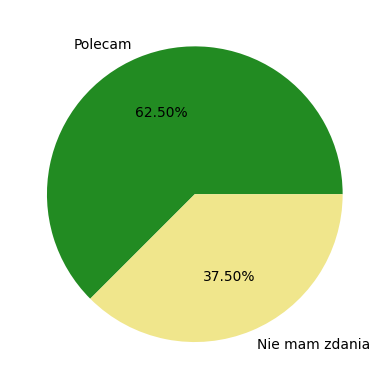

In [69]:
recommendation.plot.pie(
    label='',
    labels=['Nie Polecam','Polecam','Nie mam zdania'],
    autopct = lambda x: f"{x:1.2f}%" if x>0 else "",
    colors=['crimson','forestgreen','khaki']
)